<a href="https://colab.research.google.com/github/Kirthana270405/FUTURE_DS_03/blob/main/Future_Interns_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
sns.set(style="whitegrid", palette="muted")

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("student_feedback_task3.csv")
print("Dataset Preview:")
print(df.head())


Saving student_feedback_task3.csv to student_feedback_task3.csv
Dataset Preview:
   ID      Event Department  Rating  \
0   1   Workshop         CE       4   
1   2   Workshop        CSE       5   
2   3  Tech Fest        EEE       5   
3   4  Tech Fest        CSE       3   
4   5    Seminar         CE       3   

                                            Feedback  
0               It was good, interactive and useful.  
1  Excellent sessions, very informative and engag...  
2  Had a wonderful experience, everything was per...  
3            The event was average, can be improved.  
4     The event was fine but could be more exciting.  


In [ ]:
print("\nMissing values:\n", df.isnull().sum())
df = df.drop_duplicates()
df['Feedback'] = df['Feedback'].fillna("No Comment")
print("\nAfter cleaning:")
print(df.info())


Missing values:
 ID            0
Event         0
Department    0
Rating        0
Feedback      0
dtype: int64

After cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          150 non-null    int64 
 1   Event       150 non-null    object
 2   Department  150 non-null    object
 3   Rating      150 non-null    int64 
 4   Feedback    150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB
None


In [ ]:
print("\nRatings Summary:")
print(df['Rating'].describe())
print("\nRatings Count:")
print(df['Rating'].value_counts())


Ratings Summary:
count    150.000000
mean       2.986667
std        1.360945
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

Ratings Count:
Rating
4    34
3    33
2    30
1    28
5    25
Name: count, dtype: int64


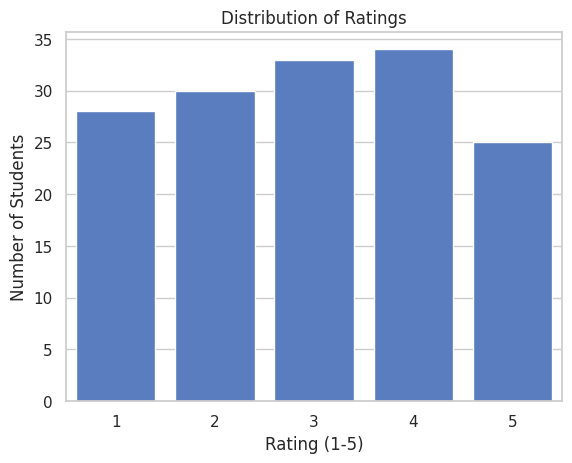


Average Rating per Event:
Event
Cultural Fest    3.379310
Seminar          3.263158
Sports Meet      2.800000
Workshop         2.750000
Tech Fest        2.629630
Name: Rating, dtype: float64


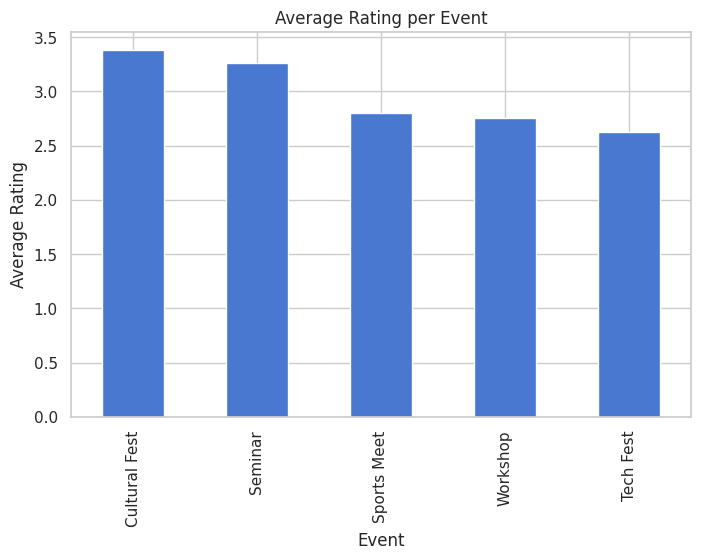

In [ ]:
rating_counts = df['Rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title("Distribution of Ratings")
plt.xlabel("Rating (1-5)")
plt.ylabel("Number of Students")
plt.show()

avg_event_rating = df.groupby("Event")['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per Event:")
print(avg_event_rating)

avg_event_rating.plot(kind='bar', figsize=(8,5))
plt.title("Average Rating per Event")
plt.ylabel("Average Rating")
plt.show()

In [ ]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity
df['Sentiment_Score'] = df['Feedback'].apply(get_sentiment)
def categorize(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"
df['Sentiment'] = df['Sentiment_Score'].apply(categorize)
print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Positive    88
Negative    37
Neutral     25
Name: count, dtype: int64


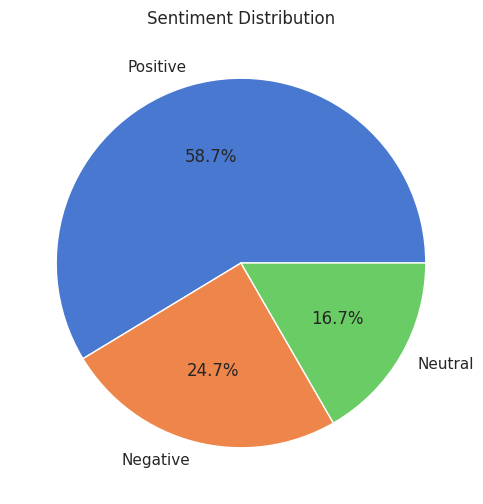

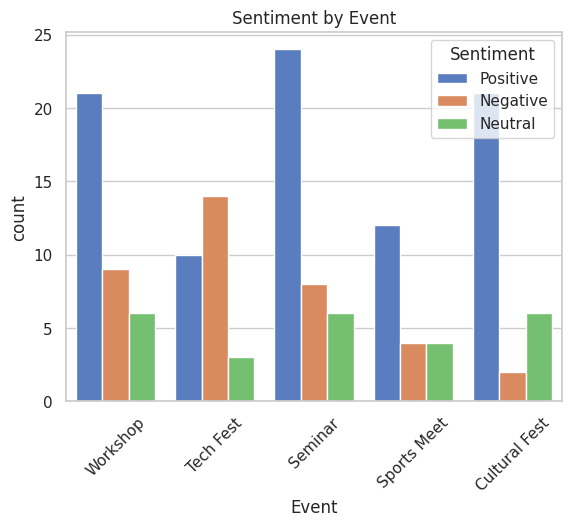

In [ ]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()
sns.countplot(data=df, x="Event", hue="Sentiment")
plt.title("Sentiment by Event")
plt.xticks(rotation=45)
plt.show()

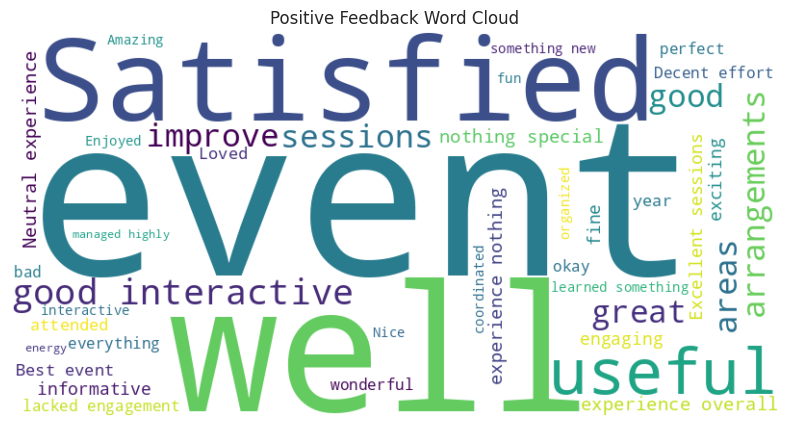

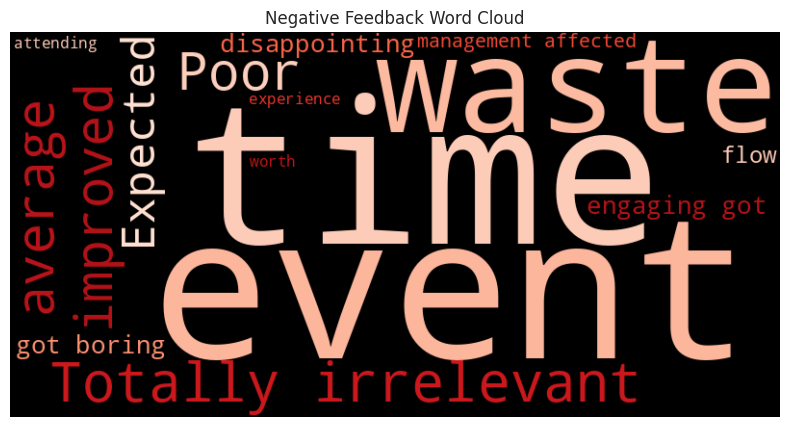

In [ ]:
positive_text = " ".join(df[df['Sentiment']=="Positive"]['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Feedback Word Cloud")
plt.show()

negative_text = " ".join(df[df['Sentiment']=="Negative"]['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Feedback Word Cloud")
plt.show()

In [ ]:
print("🔍 Key Insights:")
print("\nTop 3 Events by Rating:")
print(avg_event_rating.head(3))
print("\nSentiment Counts:")
print(df['Sentiment'].value_counts())
print("\nSample Complaints:")
print(df[df['Sentiment']=="Negative"]['Feedback'].head(5))
print("\n✅ Recommendations:")
print("- Focus on improving time management and reducing technical issues.")
print("- Workshops and Tech Fests are highly rated; more such events should be organized.")
print("- Increase interactivity in seminars to improve engagement.")

🔍 Key Insights:

Top 3 Events by Rating:
Event
Cultural Fest    3.379310
Seminar          3.263158
Sports Meet      2.800000
Name: Rating, dtype: float64

Sentiment Counts:
Sentiment
Positive    88
Negative    37
Neutral     25
Name: count, dtype: int64

Sample Complaints:
3          The event was average, can be improved.
7          The event was average, can be improved.
8          Not engaging, got boring after a while.
11    Expected more from the event, disappointing.
15    Expected more from the event, disappointing.
Name: Feedback, dtype: object

✅ Recommendations:
- Focus on improving time management and reducing technical issues.
- Workshops and Tech Fests are highly rated; more such events should be organized.
- Increase interactivity in seminars to improve engagement.


In [ ]:
from IPython.display import display
import ipywidgets as widgets


HTML(value='\n<h3>Student Feedback Dashboard</h3>\n<ul>\n<li><b>Average Rating:</b> 2.99</li>\n<li><b>Max Rati…

/tmp/ipython-input-3612922040.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_event_rating.index, y=avg_event_rating.values, palette="viridis")


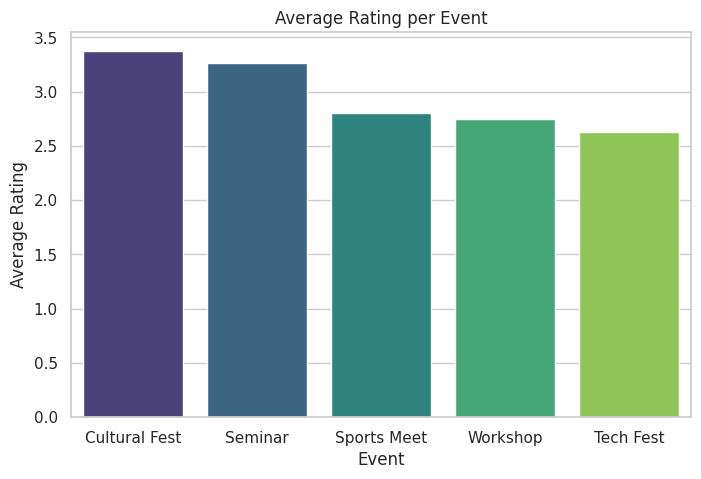

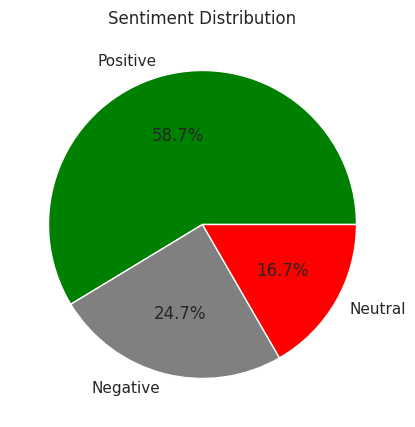

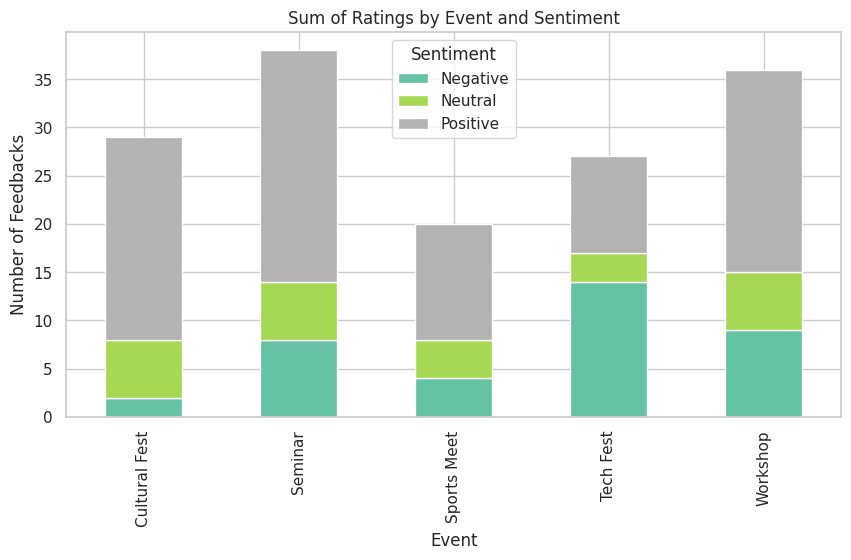

,Event,Rating
0,Cultural Fest,3.379310
1,Seminar,3.263158
2,Sports Meet,2.800000
4,Workshop,2.750000
3,Tech Fest,2.629630


In [ ]:
# Computing key metrics
avg_rating = df['Rating'].mean()
max_rating = df['Rating'].max()
min_rating = df['Rating'].min()
top_question = df.groupby("Event")['Rating'].mean().idxmax()
least_question = df.groupby("Event")['Rating'].mean().idxmin()

# Displaying as Markdown
display(widgets.HTML(f"""
<h3>Student Feedback Dashboard</h3>
<ul>
<li><b>Average Rating:</b> {avg_rating:.2f}</li>
<li><b>Max Rating:</b> {max_rating}</li>
<li><b>Min Rating:</b> {min_rating}</li>
<li><b>Top Rated Event:</b> {top_question}</li>
<li><b>Least Rated Event:</b> {least_question}</li>
</ul>
"""))

import matplotlib.pyplot as plt
import seaborn as sns

# Average rating per event
avg_event_rating = df.groupby("Event")['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_event_rating.index, y=avg_event_rating.values, palette="viridis")
plt.title("Average Rating per Event")
plt.ylabel("Average Rating")
plt.xlabel("Event")
plt.show()


# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green','grey','red'])
plt.title("Sentiment Distribution")
plt.show()


# Ratings per event & sentiment
rating_sentiment = df.groupby(['Event','Sentiment']).size().unstack(fill_value=0)

rating_sentiment.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2')
plt.title("Sum of Ratings by Event and Sentiment")
plt.ylabel("Number of Feedbacks")
plt.show()


# Table of average rating per event
avg_event_rating_df = df.groupby("Event")['Rating'].mean().reset_index()
avg_event_rating_df = avg_event_rating_df.sort_values(by="Rating", ascending=False)
display(avg_event_rating_df)

